In [1]:
from matplotlib import pyplot as plt
import matplotlib
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry as shp
from shapely.geometry import Point
from shapely.validation import explain_validity
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable



# import contextily as ctx


CRS_LAT_LON = "epsg:4326"
# CRS_WGS84 = "EPSG:32719"
CRS_WGS84 = "EPSG:3857"
CRS_CHILE19S = "EPSG:20049"

In [35]:
comunas = gpd.read_file("../Distancias/comunas_fixed/comunas_fixed.shp")

In [36]:
comunas_proyected = comunas.to_crs(CRS_CHILE19S)

In [41]:
colegios = pd.read_parquet('data_final.parquet', columns=['RBD', 'X', 'Y', 'Aristas', 'Logistica','Manipuladora', 'Beneficio', 'Alimentos', 'Raciones', 'Profit', 'UT', 'geometry'])


In [49]:
colegios["geometry"] = gpd.points_from_xy(colegios["X"]/10**5, colegios["Y"]/10**5, z=None, crs=CRS_CHILE19S)

In [50]:
geometry = [Point(xy) for xy in zip(colegios.X/10**5, colegios.Y/10**5)]
colegios_gpd = gpd.GeoDataFrame(colegios, crs=CRS_CHILE19S, geometry=geometry)

In [25]:
colegios_gpd['geometry']

0       POINT (320621.29572 6212626.08817)
1       POINT (308355.97943 6203997.07399)
2       POINT (349557.24103 6241151.40951)
3       POINT (212443.55161 5348011.76765)
4       POINT (265224.00054 6029966.74240)
                       ...                
8780    POINT (347553.90549 6295424.38614)
8781    POINT (346596.52703 6298376.46527)
8782    POINT (347742.80125 6306030.01472)
8783    POINT (348884.72945 6293749.08288)
8784    POINT (371079.95842 4109558.55508)
Name: geometry, Length: 8785, dtype: geometry

In [ ]:
colegios_gpd.plot()

In [133]:
def identidad(x, value=35):
    return int(x==value)

In [142]:
def show_schools_and_comunas(comunas, colegios, name_value, name_graph):


    fig,ax=plt.subplots(1,1,figsize=(15,15))

    colegios['value_log'] = colegios[name_value].apply(lambda x: identidad(x)) 
    colegios.plot(ax=ax, column='value_log', cmap='Pastel1', legend=True, markersize=1)


    # colegios['value','geometry'].plot(ax=ax, cmap='viridis', legend=True)
    comunas.boundary.plot(ax=ax,color='k',lw=0.2)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.legend([])
    # ax.plot(grid_x, grid_y, marker='.', markersize=1,color='k', linestyle='none')

In [120]:
comunas_proyected.crs == colegios_gpd.crs

True

In [121]:
columna = "UT"


In [140]:
colegios_gpd[colegios_gpd['UT']==35]

,RBD,X,Y,Aristas,Logistica,Manipuladora,Beneficio,Alimentos,Raciones,Profit,UT,geometry,value_log
285,[9590],34911036002,628825242233,"[3296, 3162, 3365, 3152, 3328]",736630,358000,60223150,51670750,395,7457770,35,POINT (349110.360 6288252.422),13.509841
768,[11789],35187529217,628778915302,"[7962, 7953, 7944, 8235, 8227]",739791,358000,153812815,131969575,1011,20745449,35,POINT (351875.292 6287789.153),13.514123
771,[26292],35279408694,629041333656,"[8176, 8242, 7964, 8202, 7960, 8137, 7941, 8266]",737301,358000,123292260,105783300,810,16413659,35,POINT (352794.087 6290413.337),13.510752
775,[882640],35555559733,629015258023,"[8219, 778, 7949, 8225]",745082,0,2737800,2349000,18,-356282,35,POINT (355555.597 6290152.580),13.521250
776,[883757],35414493357,629062500220,"[7959, 8202, 5481, 7940, 7957, 7948]",737173,0,836550,717750,5,-618373,35,POINT (354144.934 6290625.002),13.510578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,[10572],34362132780,628682350844,"[8292, 8290, 8293, 8287, 7075, 8294, 8281]",739687,0,15822625,13575625,104,1507313,35,POINT (343621.328 6286823.508),13.513982
8554,[25938],34883784956,628546308138,"[3336, 8302, 8296, 8301, 8300, 7053]",735523,0,35004970,30033850,230,4235597,35,POINT (348837.850 6285463.081),13.508337
8593,[25016],34852651936,628670252351,"[3153, 3155, 3161, 7058, 7055, 3366]",735772,358000,100298120,86054600,659,13149748,35,POINT (348526.519 6286702.524),13.508676
8755,[884642],34988839645,628828457594,"[3296, 3162, 8397, 3149]",738035,0,253500,217500,1,-702035,35,POINT (349888.396 6288284.576),13.511747


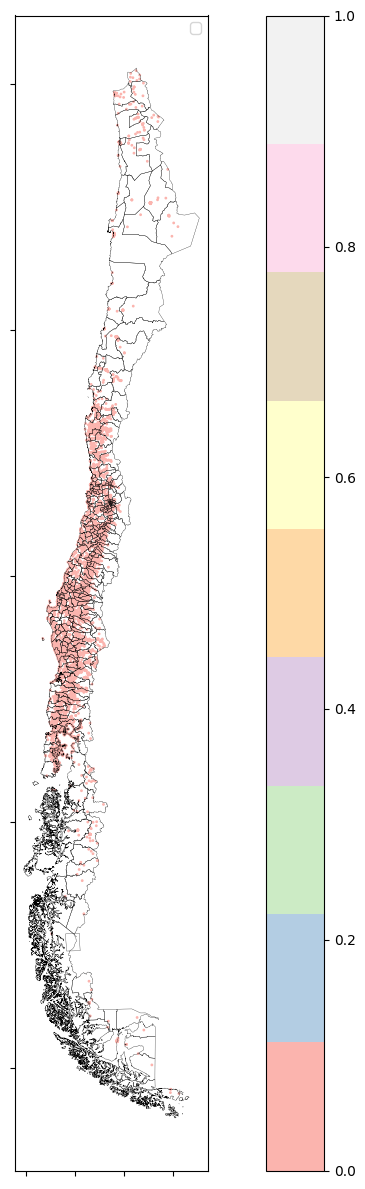

In [143]:
show_schools_and_comunas(comunas_proyected, colegios_gpd[colegios_gpd[columna]<7*10**6], columna, name_graph='Colegios puntuales')

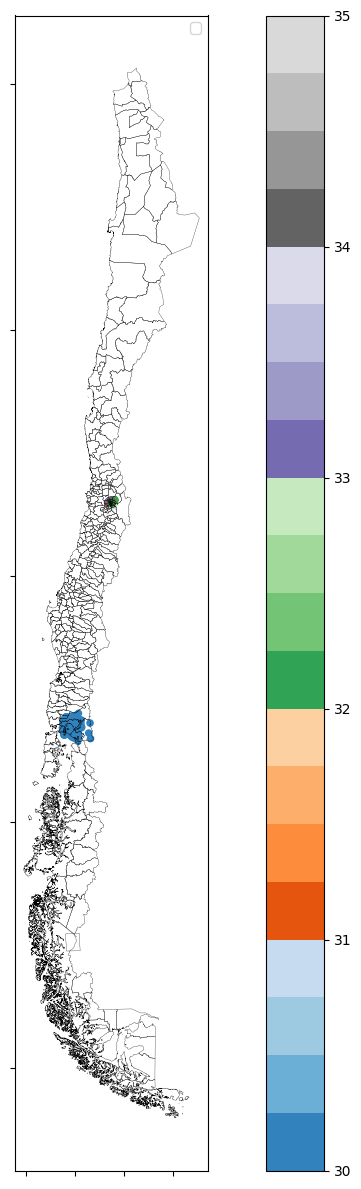

In [168]:
i=30
fig,ax=plt.subplots(1,1,figsize=(15,15))
colegios_gpd[(colegios_gpd['UT']<=i+5) & (i<=colegios_gpd['UT'])].plot(ax=ax, column='UT', cmap='tab20c', legend=True, markersize=20)


comunas_proyected.boundary.plot(ax=ax,color='k',lw=0.2)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.legend([]);